In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/VICTUS/Desktop/PyhtonAdventure/Datasets/onlinefoods.csv")
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [3]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [5]:
df.groupby(by=["Monthly Income"])["Age"].mean()

Monthly Income
10001 to 25000     24.800000
25001 to 50000     26.434783
Below Rs.10000     23.880000
More than 50000    27.290323
No Income          23.139037
Name: Age, dtype: float64

In [6]:
df["Educational Qualifications"].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [7]:
df_temp = df.copy()

In [8]:
change_edu_tonumeric = {'Post Graduate':2,'Graduate':3,'Ph.D':4, 'Uneducated':0,'School':1}
df_temp['Educational Qualifications'] = df_temp['Educational Qualifications'].map(change_edu_tonumeric)
df_temp.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,2,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,2,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,2,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,2,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,2,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [9]:
df_temp["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [10]:
change_income_tonumeric = {"No Income":0,"Below Rs.10000":10000,
                           "More than 50000":50000 , "10001 to 25000": 17500,
                           "25001 to 50000": 37500}

df_temp["Monthly Income"] = df_temp["Monthly Income"].map(change_income_tonumeric)
df_temp.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,0,2,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,10000,3,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,10000,2,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,0,3,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,10000,2,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [11]:
df_temp["Monthly Income"] = df_temp["Monthly Income"].astype(int)

In [12]:
df_temp.groupby("Monthly Income")["Educational Qualifications"].count()

Monthly Income
0        187
10000     25
17500     45
37500     69
50000     62
Name: Educational Qualifications, dtype: int64

In [13]:
df_temp.groupby("Educational Qualifications")["Monthly Income"].mean().astype(int)

Educational Qualifications
0    25000
1    22708
2    13548
3    18757
4    31521
Name: Monthly Income, dtype: int32

In [14]:
eq_school = df_temp[df_temp["Educational Qualifications"] == 1]
eq_school.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
116,31,Female,Married,House wife,0,1,5,13.0289,77.5400,560022,Yes,Positive,Yes
143,30,Female,Married,House wife,0,1,5,12.9980,77.6227,560005,Yes,Positive,Yes
168,25,Male,Married,Self Employeed,50000,1,2,13.0626,77.5284,560015,Yes,Positive,Yes
184,32,Female,Married,House wife,0,1,5,12.9889,77.5741,560020,Yes,Positive,Yes
189,31,Male,Married,Self Employeed,50000,1,6,13.0487,77.5923,560024,Yes,Positive,Yes


In [15]:
eq_school_main = df[df["Educational Qualifications"] == "School"]
eq_school_main.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
116,31,Female,Married,House wife,No Income,School,5,13.0289,77.5400,560022,Yes,Positive,Yes
143,30,Female,Married,House wife,No Income,School,5,12.9980,77.6227,560005,Yes,Positive,Yes
168,25,Male,Married,Self Employeed,More than 50000,School,2,13.0626,77.5284,560015,Yes,Positive,Yes
184,32,Female,Married,House wife,No Income,School,5,12.9889,77.5741,560020,Yes,Positive,Yes
189,31,Male,Married,Self Employeed,More than 50000,School,6,13.0487,77.5923,560024,Yes,Positive,Yes


In [16]:
df_temp["Occupation"].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [17]:
df_temp.groupby("Occupation")["Monthly Income"].mean().astype(int)

Occupation
Employee          35444
House wife            0
Self Employeed    37731
Student            2439
Name: Monthly Income, dtype: int32

In [18]:
df_temp.groupby("Feedback")["Monthly Income"].mean().astype(int)

Feedback
Negative     23556
Positive     15938
Name: Monthly Income, dtype: int32

In [19]:
df_temp["Feedback"].unique()

array(['Positive', 'Negative '], dtype=object)

In [20]:
change_feedback_tonumeric = {"Negative ": 0 ,"Positive": 1}
df_temp["Feedback"] = df_temp["Feedback"].map(change_feedback_tonumeric)
df_temp.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,Female,Single,Student,10000,3,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,Male,Single,Student,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,Female,Single,Student,0,3,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,Male,Single,Student,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


In [21]:
df_temp.groupby("Occupation")["Age"].mean()

Occupation
Employee          26.576271
House wife        30.333333
Self Employeed    26.388889
Student           22.811594
Name: Age, dtype: float64

In [22]:
df_temp.groupby("Occupation")["Educational Qualifications"].mean()

Occupation
Employee          2.779661
House wife        1.555556
Self Employeed    2.481481
Student           2.449275
Name: Educational Qualifications, dtype: float64

In [23]:
df_temp.groupby("Feedback")["Family size"].mean()

Feedback
0    3.309859
1    3.274448
Name: Family size, dtype: float64

In [24]:
df_temp["Occupation"].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [25]:
change_occupation_tonumeric = {'House wife':0,'Student':1,'Employee':2,'Self Employeed':3}
df_temp["Occupation"] = df_temp["Occupation"].map(change_occupation_tonumeric)
df_temp.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,Female,Single,1,10000,3,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,Male,Single,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,Female,Single,1,0,3,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,Male,Single,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


In [26]:
df_fb = df_temp.groupby("Feedback")[["Family size","Educational Qualifications","Monthly Income","Age"]].mean()
df_fb.head()

,Family size,Educational Qualifications,Monthly Income,Age
Feedback,,,,
0,3.309859,2.661972,23556.338028,25.873239
1,3.274448,2.504732,15938.485804,24.350158


In [27]:
df_temp.groupby("Occupation")[["Family size","Educational Qualifications","Monthly Income","Age","Feedback"]].mean()

,Family size,Educational Qualifications,Monthly Income,Age,Feedback
Occupation,,,,,
0,4.777778,1.555556,0.000000,30.333333,0.888889
1,3.154589,2.449275,2439.613527,22.811594,0.898551
2,3.279661,2.779661,35444.915254,26.576271,0.720339
3,3.518519,2.481481,37731.481481,26.388889,0.703704


In [28]:
df_temp["Marital Status"].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [29]:
df_temp.groupby("Marital Status")["Feedback"].mean()

Marital Status
Married              0.712963
Prefer not to say    0.583333
Single               0.869403
Name: Feedback, dtype: float64

In [30]:
df_temp.groupby("Gender")["Feedback"].mean()

Gender
Female    0.837349
Male      0.801802
Name: Feedback, dtype: float64

In [31]:
df_temp2 = df_temp.loc[:,["Educational Qualifications","Age","Family size","Feedback","Monthly Income","Occupation"]]
df_temp2.head()

,Educational Qualifications,Age,Family size,Feedback,Monthly Income,Occupation
0,2,20,4,1,0,1
1,3,24,3,1,10000,1
2,2,22,3,0,10000,1
3,3,22,6,1,0,1
4,2,22,4,1,10000,1


In [32]:
df_temp2.corr()

,Educational Qualifications,Age,Family size,Feedback,Monthly Income,Occupation
Educational Qualifications,1.000000,0.038129,0.010835,-0.089621,0.155542,0.162007
Age,0.038129,1.000000,0.169982,-0.198170,0.564433,0.422893
Family size,0.010835,0.169982,1.000000,-0.010148,0.082413,0.030426
Feedback,-0.089621,-0.198170,-0.010148,1.000000,-0.148939,-0.214233
Monthly Income,0.155542,0.564433,0.082413,-0.148939,1.000000,0.775306
Occupation,0.162007,0.422893,0.030426,-0.214233,0.775306,1.000000


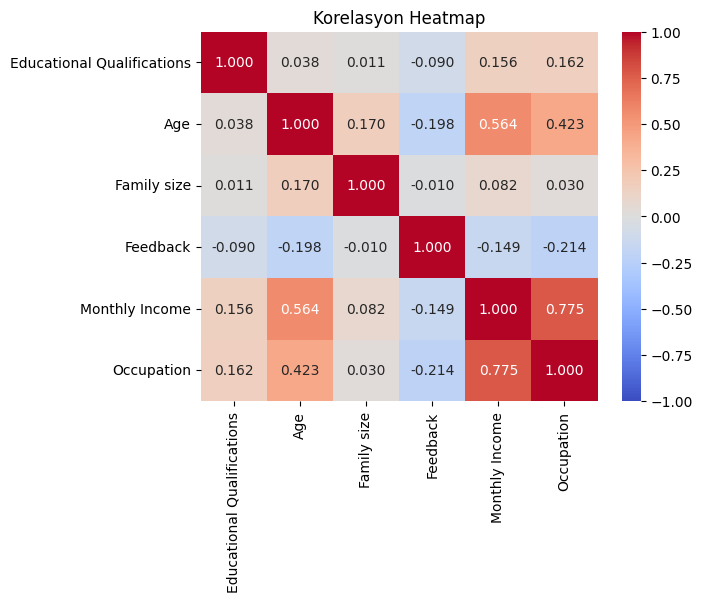

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Korelasyon matrisini ısı haritasına dönüştür
sns.heatmap(df_temp2.corr(), annot=True, cmap="coolwarm", fmt=".3f" ,vmin=-1,vmax=1)
plt.title('Korelasyon Heatmap')
plt.show()

In [34]:
df_temp.groupby("Marital Status")["Monthly Income"].mean()

Marital Status
Married              34884.259259
Prefer not to say    30625.000000
Single                9664.179104
Name: Monthly Income, dtype: float64